In [55]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [63]:
import numpy as np

X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8) # convert the string labels to int labels

In [64]:
X.shape, y.shape

((70000, 784), (70000,))

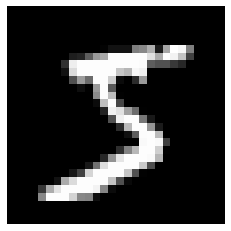

In [65]:
# Plotting the image
import matplotlib.pyplot as plt
%matplotlib inline

sample = X[0]
sample_image = sample.reshape(28, 28)

plt.imshow(sample_image, cmap="gray")
plt.axis('off')
plt.show()

In [66]:
# Splitting the dataset into train and test set

num_samples = 60000
X_train, y_train = X[:num_samples]/ 255.0, y[:num_samples]   # dividing by 255 to have all values
# between 0 and 1
X_test, y_test = X[num_samples:] / 255.0, y[num_samples:] 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [67]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [68]:
# For our example, we will only consider the binary labels as 5 and not 5

y_train5 = (y_train == 5)
y_test5 = (y_test == 5)

In [70]:
# Implementing Logistic Regression model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear', max_iter = 1000)
clf.fit(X_train, y_train5)

LogisticRegression(max_iter=1000, solver='liblinear')

In [71]:
# Making prediction on some data, let's say the sample 
clf.predict([sample])

array([ True])

In [72]:
clf.score(X_test, y_test5) # returns the accuracy of the model on the test set

# The accuracy is measured by total number of correct predicted labels / total labels

0.9779

In [77]:
y_test_pred = clf.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test5, y_test_pred)

array([[9040,   68],
       [ 153,  739]])

In [81]:
# The confusion matrix represents a 2 * 2 matrix, where 0,0 represents the true negative values, 
# 0, 1 represents the false positive, 1,0 represents the true negative and 1,1 represent the true positive

In [89]:
# It is important to note that we perform finding the threshold value on the train set and not test set.
# Test set is only to find once we have our threshold value set, how good it performs on unseen test data. 
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train, y_train5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train5, y_train_pred)

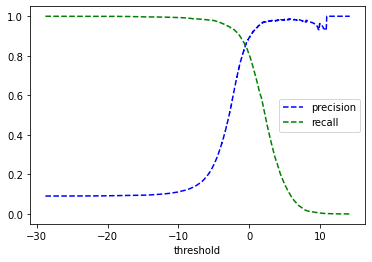

In [91]:
plt.plot(thresholds, precisions[:-1], 'b--', label="precision")
plt.plot(thresholds, recalls[:-1], 'g--', label="recall")
plt.xlabel('threshold')
plt.legend()
plt.show()

In [92]:
threshold_above_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [95]:
threshold_above_90_precision

# if you plot a line vertical to the point 0.12267 then we will find that we have a precision of 90 and recall
#of around 44 for this threshold value.  

0.12267875777846365

In [96]:
# another metric to determine the performance on binary classifier is the ROC curve. 
# If the area of the ROC curve is close to 1, then the calssifier is perfomring better

# ROC curve is the plot between true positive rate (recall) vs false positive rate (FPR)
# FPR = FP / FP + TN

# in this case also, there is a tradeoff between recall and FPR, if recall goes high, then it means,
# we are lowering the threshold, as a result, there will be many examples which are negative labels, but will
# be marked as positive. As a result, the false positives number increases. Therefore, the higher the recall, 
# leads to higher false positives. A good classifier would try to have high recall at low number of false positive
# as a result, we like the curve to be as high as possible leading to area of 1. 


# We can calculate it in scikit learn from the following code:

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5, y_train_pred)

0.9749441853820682

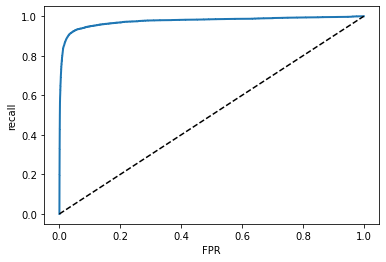

In [100]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train5, y_train_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('recall')
plt.show()